<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/julianblueml/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






placeholder: tensor which are fed externally for example input or output tensors
variables: tesnors reprent the paramers of he nework graph


In [0]:
import tensorflow as tf
import numpy as np

In [14]:
#parameters
learning_rate=0.001
training_iters=200
batch_size=128

#network parameters
num_inputs=3
num_outputs=4
num_samples=100

X_gr=np.random.rand(num_samples,num_inputs)
Y_gr=np.random.rand(num_samples,num_outputs)

#tf Graph inputs
x=tf.placeholder(tf.float32,[None,num_inputs])
y=tf.placeholder(tf.float32,[None,num_outputs])

#initialize weights
w_1=tf.Variable(tf.random_normal([num_inputs,num_outputs]))

#model
y_p=tf.matmul(x,w_1)

#cost
cost=tf.reduce_mean(tf.pow(y-y_p,2))  #if costfunction is the mean square error

#optimisation
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initializing the graph and the weights
init=tf.global_variables_initializer()

#Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(1000):
  
    sess.run(optimizer,feed_dict={x: X_gr, y: Y_gr})
  
    pr_cost=sess.run(cost,feed_dict={x: X_gr, y: Y_gr})
    
    #print('Cost at iteration ', i,' is: ',pr_cost)
    
  Y_p_p=sess.run(y_p,feed_dict={x: X_gr, y: Y_gr})
  print('prediction error ',abs(Y_p_p-Y_gr))

prediction error  [[0.08706527 0.22227918 0.17307317 0.19587612]
 [0.12217768 0.18747675 0.60542193 0.24655775]
 [0.14058649 0.45091844 0.53207831 0.18104354]
 [0.60738767 0.08639518 0.67046181 0.39350741]
 [0.14778367 0.11503242 0.77534875 0.00635521]
 [0.4218795  0.28150145 0.51169949 0.2378768 ]
 [0.59550938 0.45371448 0.18600067 0.18324254]
 [0.42432377 0.46432578 0.48384857 0.1514943 ]
 [0.68346406 0.03095527 0.3730602  0.46588948]
 [0.40262748 0.54960878 0.18120493 0.03612313]
 [0.02592609 0.41085821 0.22666276 0.14193958]
 [0.17456174 0.60122972 0.31976542 0.15972869]
 [0.16499099 0.01522087 0.04675715 0.10796038]
 [0.29754681 0.06518524 0.52469327 0.17030137]
 [0.1614586  0.35499395 0.23685987 0.25727932]
 [0.29147277 0.0526848  0.43923788 0.08598555]
 [0.04141618 0.10903251 0.6205448  0.61960314]
 [0.45893584 0.26957936 0.31481146 0.47480421]
 [0.27730631 0.04060277 0.33445269 0.19679049]
 [1.19051922 0.36803791 0.07834721 0.35558221]
 [0.53427137 0.66679453 0.58384919 0.05604

In [18]:
#parameters
learning_rate=0.001
training_iters=200
batch_size=128

#network parameters
num_inputs=3
num_h1_n=4
num_h2_n=10
num_outputs=4
num_samples=10

X_gr=np.random.rand(num_samples,num_inputs)
Y_gr=np.random.rand(num_samples,num_outputs)

#tf Graph inputs
x=tf.placeholder(tf.float32,[None,num_inputs])
y=tf.placeholder(tf.float32,[None,num_outputs])

#initialize weights
w_1=tf.Variable(tf.random_normal([num_inputs,num_h1_n]))
w_2=tf.Variable(tf.random_normal([num_h1_n,num_h2_n]))
w_3=tf.Variable(tf.random_normal([num_h2_n,num_outputs]))

#bias
b_1=tf.Variable(tf.random_normal([num_h1_n]))
b_2=tf.Variable(tf.random_normal([num_h2_n]))
b_3=tf.Variable(tf.random_normal([num_outputs]))


#model
h1=tf.nn.sigmoid(tf.add(tf.matmul(x,w_1),b_1))  #hidden layer 1
h2=tf.nn.sigmoid(tf.add(tf.matmul(h1,w_2),b_2)) #hidden layer 2
y_p=tf.add(tf.matmul(h2,w_3),b_3)               #output layer

#cost
cost=tf.reduce_mean(tf.pow(y-y_p,2))  #if costfunction is the mean square error

#optimisation
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initializing the graph and the weights
init=tf.global_variables_initializer()

#Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(1000):
  
    sess.run(optimizer,feed_dict={x: X_gr, y: Y_gr})
  
    pr_cost=sess.run(cost,feed_dict={x: X_gr, y: Y_gr})
    
    #print('Cost at iteration ', i,' is: ',pr_cost)
    
  Y_p_p=sess.run(y_p,feed_dict={x: X_gr, y: Y_gr})
  display('prediction error ',abs(Y_p_p-Y_gr))

'prediction error '

array([[0.28878736, 0.46373458, 0.10647477, 0.34256426],
       [0.1654178 , 0.38149652, 0.09211982, 0.15299316],
       [0.31100102, 0.36832802, 0.22965313, 0.5303063 ],
       [0.41287048, 0.47661053, 0.17304211, 0.29213752],
       [0.04144417, 0.13319063, 0.29790729, 0.21917549],
       [0.41661042, 0.22859673, 0.43643954, 0.14736618],
       [0.16129263, 0.42448818, 0.14582871, 0.0713651 ],
       [0.48681007, 0.48988344, 0.12773934, 0.08961366],
       [0.2827795 , 0.03619691, 0.40172079, 0.25901881],
       [0.20438436, 0.28999509, 0.17567854, 0.20871449]])

Extracting /temp/data/train-images-idx3-ubyte.gz
Extracting /temp/data/train-labels-idx1-ubyte.gz
Extracting /temp/data/t10k-images-idx3-ubyte.gz
Extracting /temp/data/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


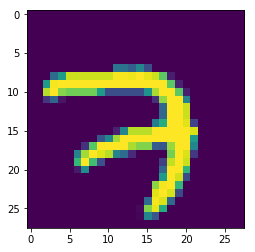

In [23]:
%matplotlib inline
from matplotlib.pyplot import imshow

#Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/temp/data/", one_hot=True)

mnist.train.images.shape
#MNIST data input (img shape 28x28)

image = mnist.train.images[0].reshape((28,28))
imshow(image)

print(mnist.train.labels[0])

#network has to have 9 outputs 0-9 

In [26]:
#Training data
X_train=mnist.train.images
Y_train=mnist.train.labels

#Testing data
X_test=mnist.test.images
Y_test=mnist.test.images

#Validation data
X_valid=mnist.validation.images
Y_valid=mnist.validation.images

#Parameters
learning_rate=0.001
training_iters=2000
batch_size=128

num_inputs=784
num_h1_n=100
num_h2_n=100
num_outputs=10

#tf Graph inputs
x=tf.placeholder(tf.float32,[None,num_inputs])
y=tf.placeholder(tf.float32,[None,num_outputs])

#initialize weights
w_1=tf.Variable(tf.random_normal([num_inputs,num_h1_n]))
w_2=tf.Variable(tf.random_normal([num_h1_n,num_h2_n]))
w_3=tf.Variable(tf.random_normal([num_h2_n,num_outputs]))

#bias
b_1=tf.Variable(tf.random_normal([num_h1_n]))
b_2=tf.Variable(tf.random_normal([num_h2_n]))
b_3=tf.Variable(tf.random_normal([num_outputs]))


#model
h1=tf.nn.sigmoid(tf.add(tf.matmul(x,w_1),b_1))  #hidden layer 1
h2=tf.nn.sigmoid(tf.add(tf.matmul(h1,w_2),b_2)) #hidden layer 2
y_p=tf.add(tf.matmul(h2,w_3),b_3)               #output layer

#cost
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p,labels=y))  #comparing two different distributions

#Evaluate model
#2 images, y_p=[[0.1,0.3,0.2,0.9],[0.8,0.1,0.2,0,1]]
#tf.argmax(y_p,1) -> [4,1]
#            y=[[0,0,0,1],[0,0,1,0]]
#tf.argmax(y,1) -> [4,3]
#tf.equal() -> [True, False]
#tf.reuce_mean() -> 0.5
correct_pred=tf.equal(tf.argmax(y_p,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#optimisation
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initializing the graph and the weights
init=tf.global_variables_initializer()

#Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(1000):
    batch_x, batch_y=mnist.train.next_batch(batch_size)
    
    sess.run(optimizer,feed_dict={x: batch_x, y: batch_y})
  
    train_cost,train_accuracy=sess.run([cost,accuracy],feed_dict={x: batch_x, y: batch_y})
    
    test_batch_x,test_batch_y=mnist.test.next_batch(batch_size)
    
    test_cost,test_accuracy=sess.run([cost,accuracy],feed_dict={x: batch_x, y: batch_y})
    
    print('Train_cost',train_cost,' Train_accuracy',train_accuracy,'Test_cost',test_cost,' Test_accuracy',test_accuracy)

Train_cost 11.150161  Train_accuracy 0.125 Test_cost 11.150161  Test_accuracy 0.125
Train_cost 12.1324835  Train_accuracy 0.0625 Test_cost 12.1324835  Test_accuracy 0.0625
Train_cost 10.687178  Train_accuracy 0.109375 Test_cost 10.687178  Test_accuracy 0.109375
Train_cost 11.660044  Train_accuracy 0.0859375 Test_cost 11.660044  Test_accuracy 0.0859375
Train_cost 9.675132  Train_accuracy 0.125 Test_cost 9.675132  Test_accuracy 0.125
Train_cost 9.549274  Train_accuracy 0.1015625 Test_cost 9.549274  Test_accuracy 0.1015625
Train_cost 9.7617445  Train_accuracy 0.1015625 Test_cost 9.7617445  Test_accuracy 0.1015625
Train_cost 9.423995  Train_accuracy 0.09375 Test_cost 9.423995  Test_accuracy 0.09375
Train_cost 9.311283  Train_accuracy 0.09375 Test_cost 9.311283  Test_accuracy 0.09375
Train_cost 8.116012  Train_accuracy 0.09375 Test_cost 8.116012  Test_accuracy 0.09375
Train_cost 8.505035  Train_accuracy 0.1328125 Test_cost 8.505035  Test_accuracy 0.1328125
Train_cost 7.5476704  Train_accura